# Mobile Price Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

В качестве первого датасета я выбрал датасет "Mobile Price Classification", в нем есть следующие параметры:
1. battery_power: Объем батареи в мАч.
2. blue: Наличие bluetooth
3. clock_speed: Скорость, с которой микропроцессор выполняет инструкции
4. dual_sim: Имеет поддержку двойной sim или нет
5. fc: Мега пикселей во фронтальной камере
6. four_g: Наличие 4G
7. int_memory: Внутренняя память в гигабайтах
8. m_dep: Глубина устройства в см
9. mobile_wt: Вес телефона
10. n_cores: Количество ядер процессора
11. pc: Мега пикселей в основной камере
12. px_height: Пикселей в экране в высоту
13. px_width: Пикселей в экране в ширину
14. ram: Размер оперативной памяти
15. sc_h: Высота экрана телефона в сантиметрах
16. sc_w: Ширина экрана мобильного телефона в сантиметрах
17. talk_time: Наибольшее время, в течение которого один раз заряд батареи будет длиться
18. three_g: Наличие 3G
19. touch_screen: Имеет сенсорный экран или нет
20. wifi: наличие WiFi

А цены делятся на 4 категории (от 0 до 3) 0 -- самые дешевые устройства, 3 -- самые дорогие.

In [2]:
dataset=pd.read_csv('train.csv')
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Информация о датасете

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12f631310>,
      dtype=object)

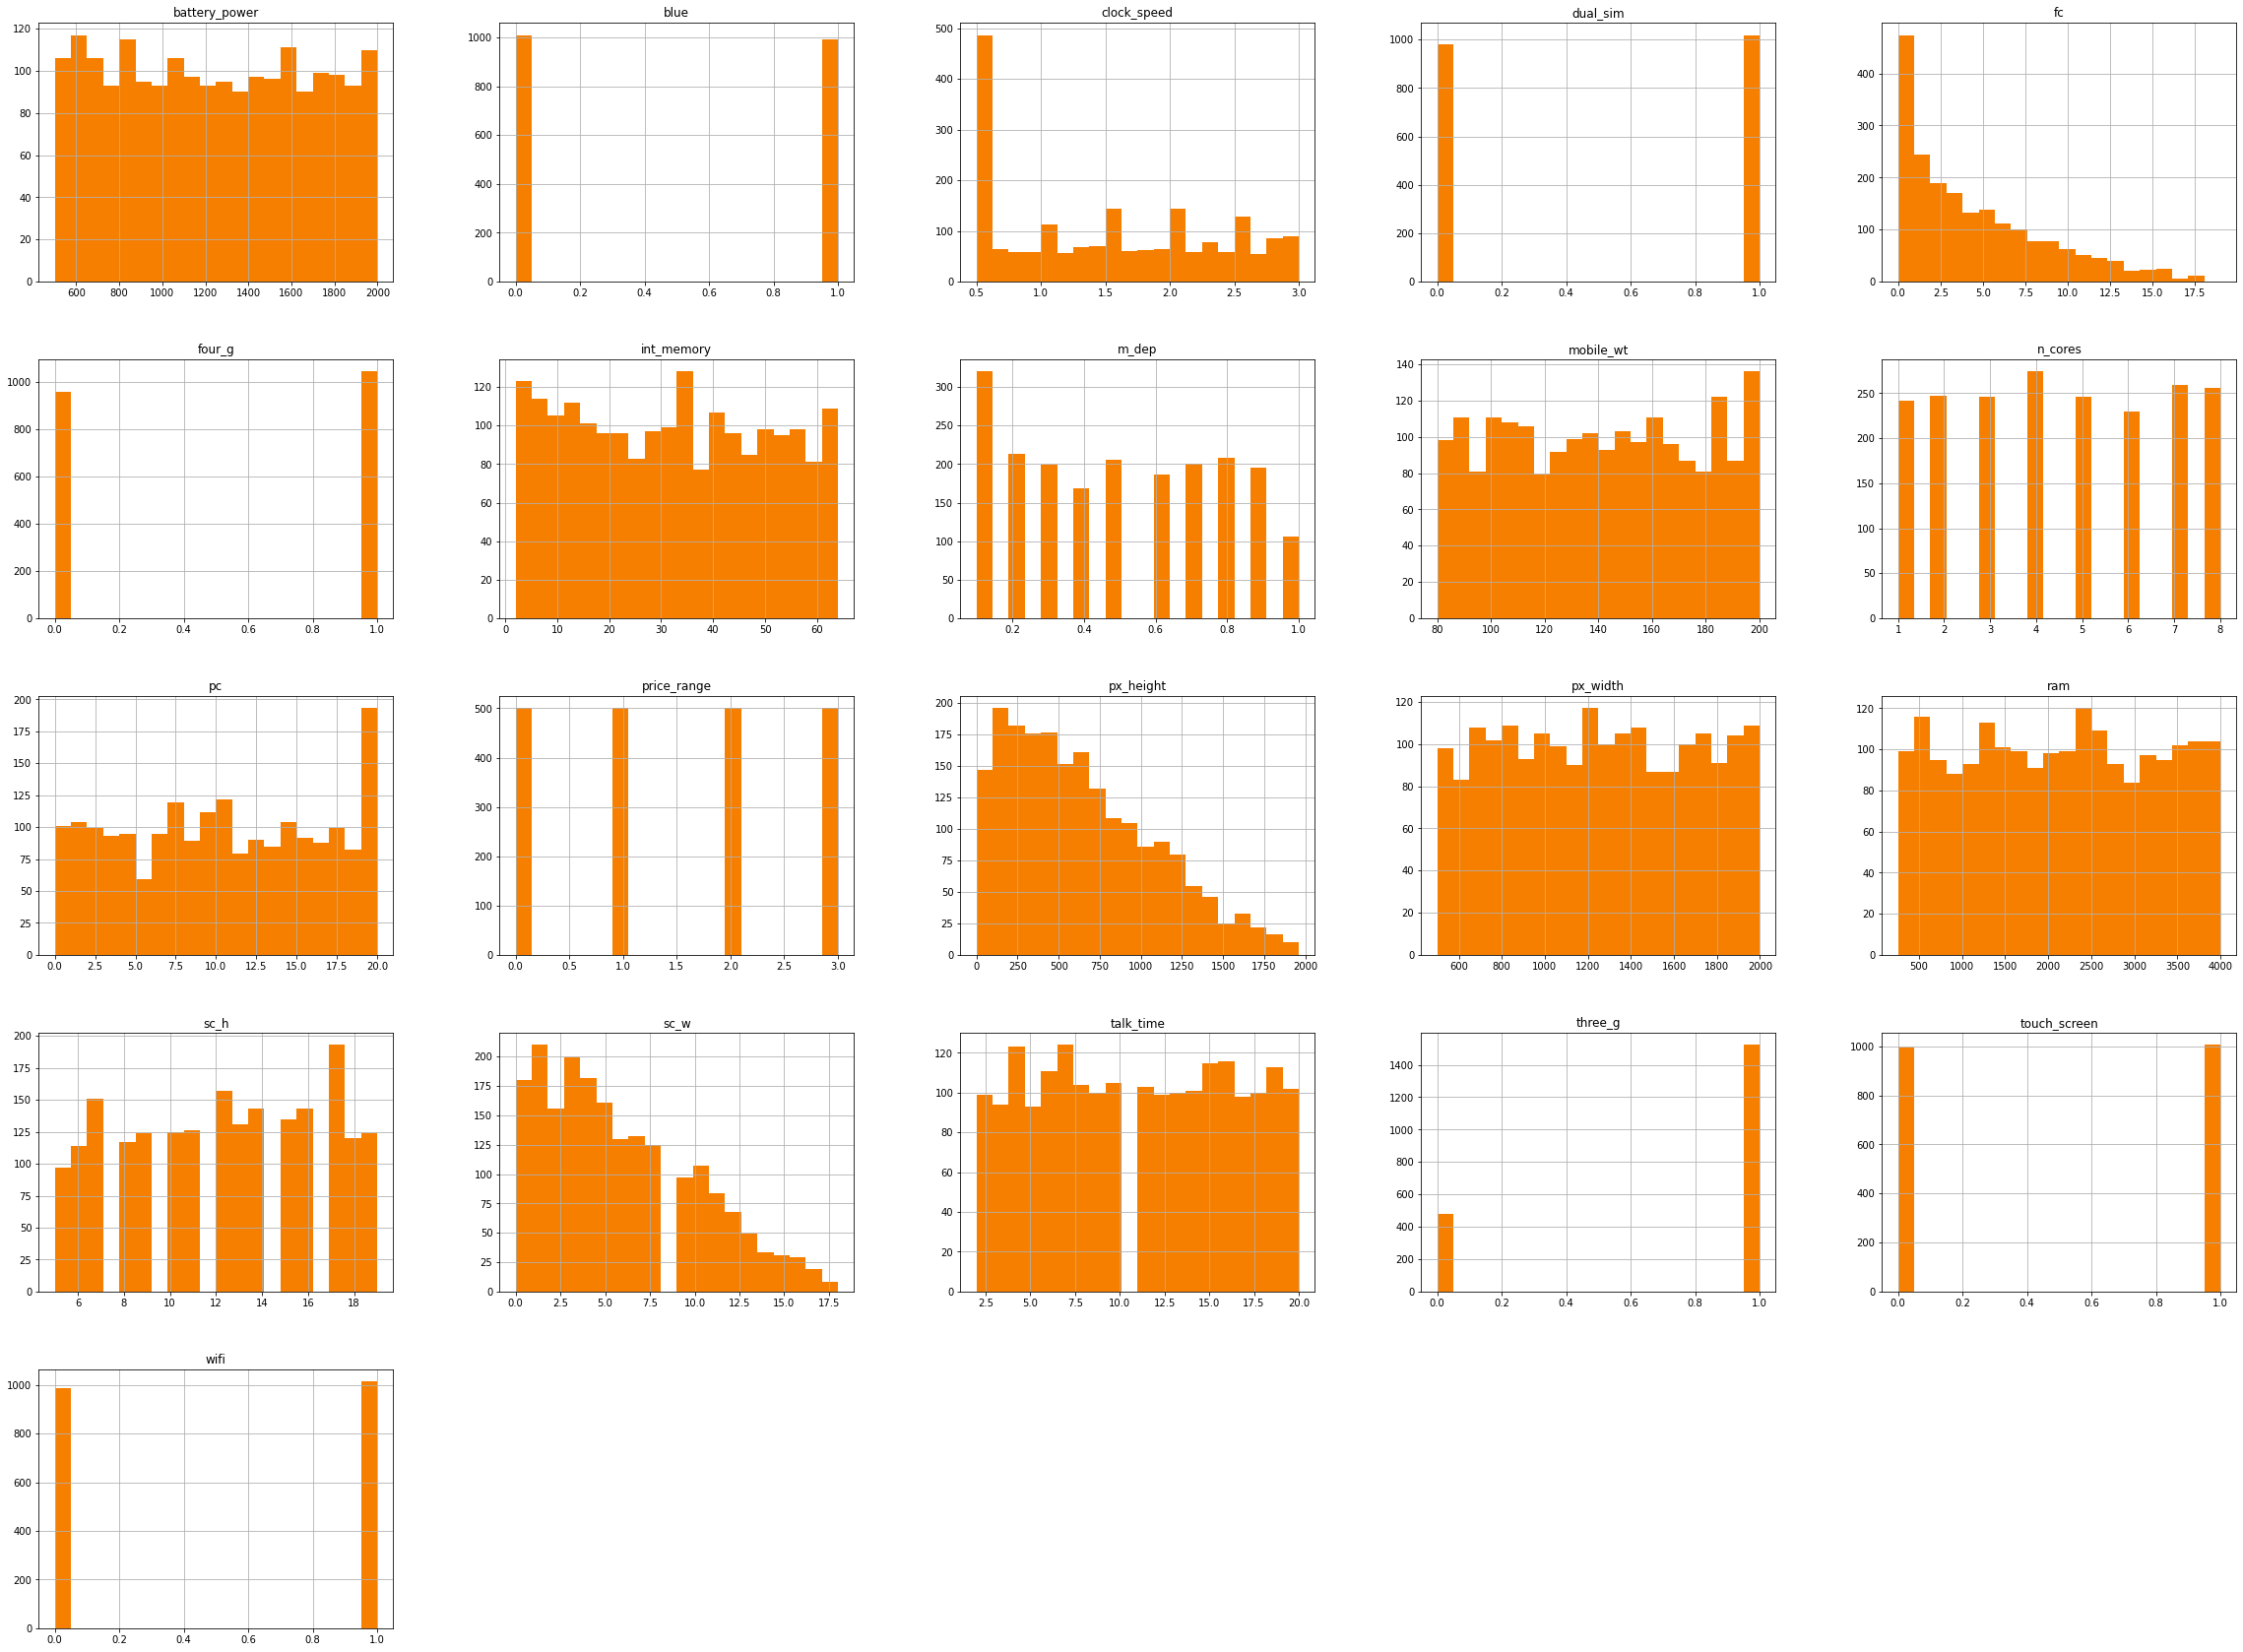

In [26]:
dataset.hist(bins=20, figsize=(40,30), color="#f77f00")

## Визуальный анализ

### Ищем признаки, влияющие на цену

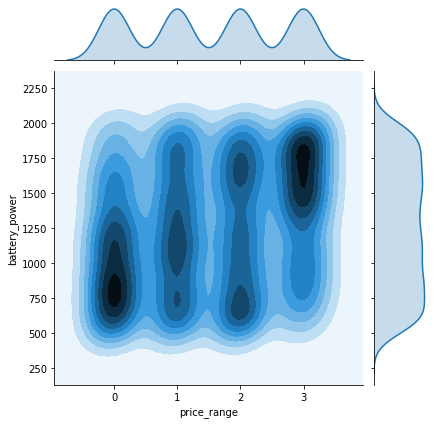

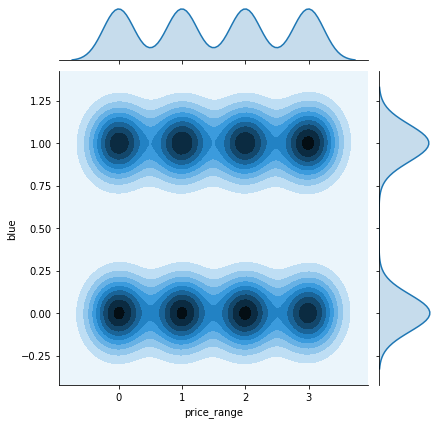

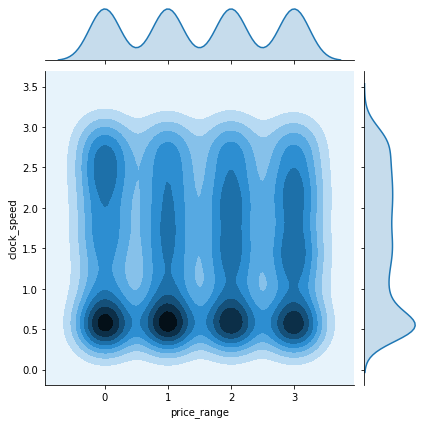

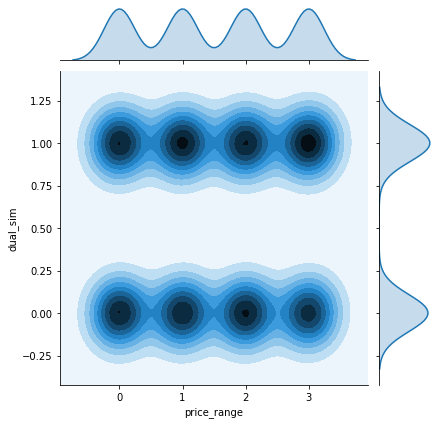

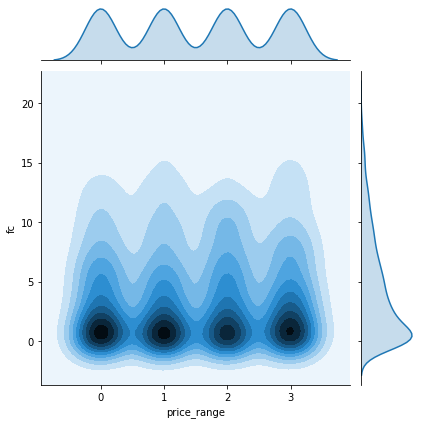

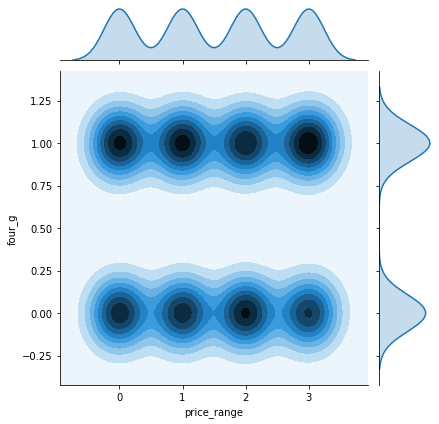

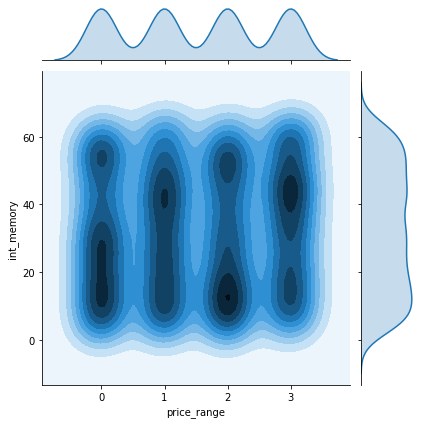

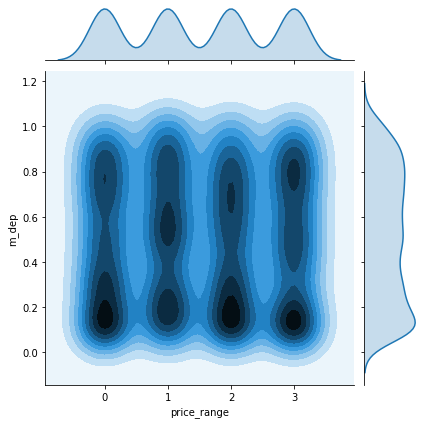

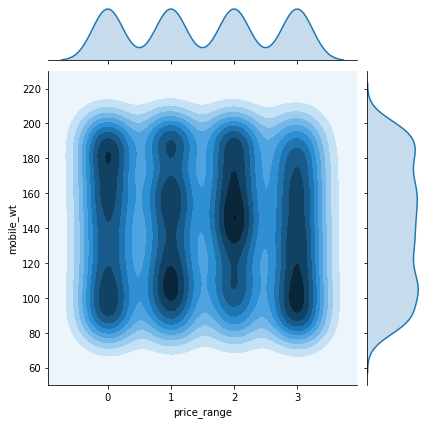

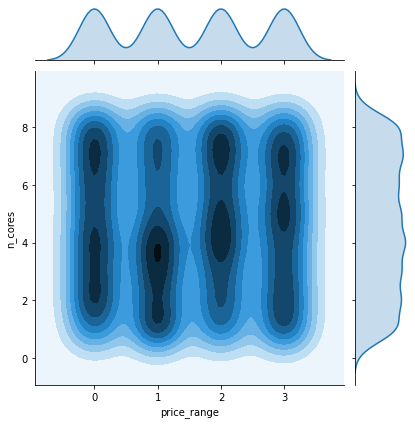

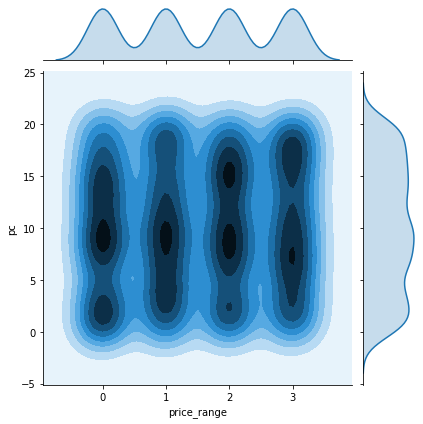

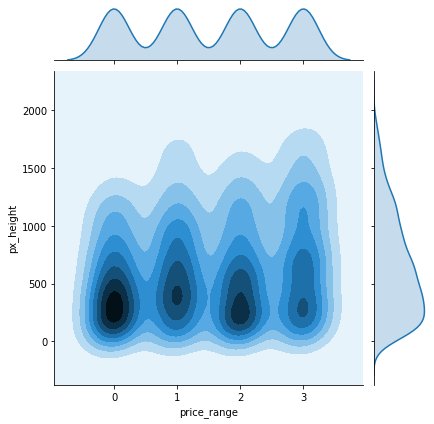

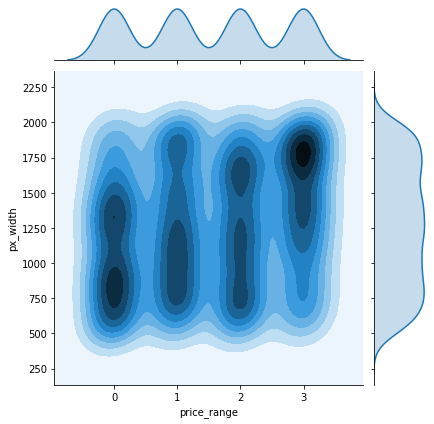

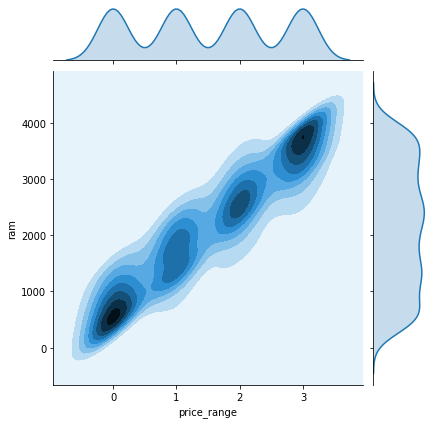

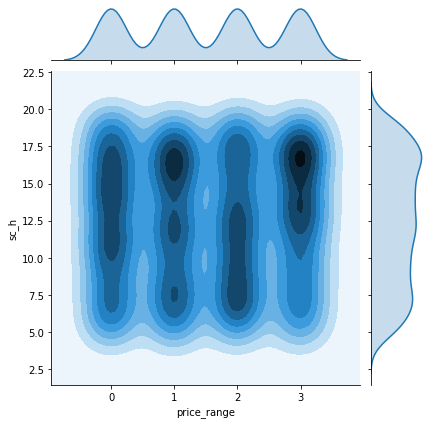

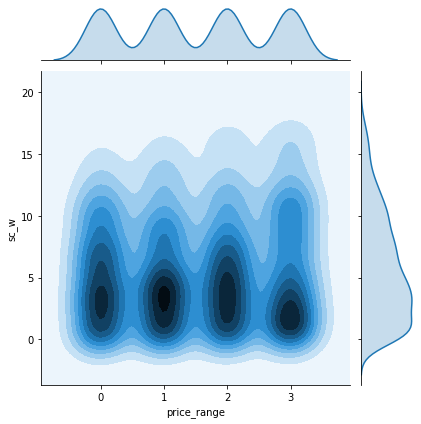

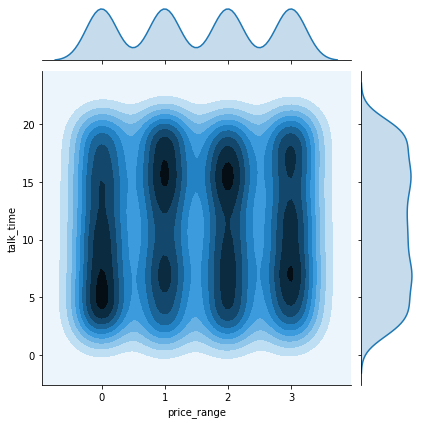

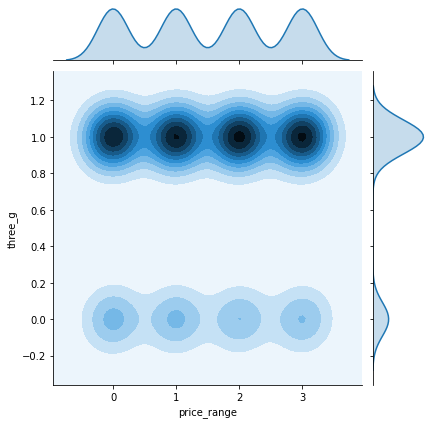

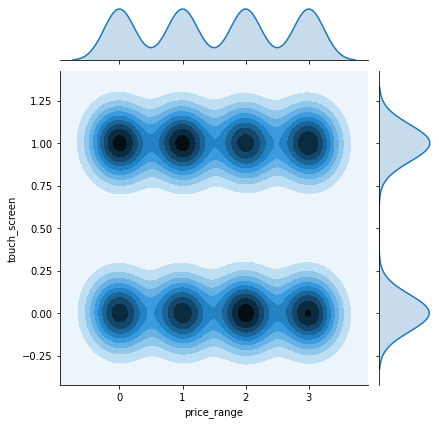

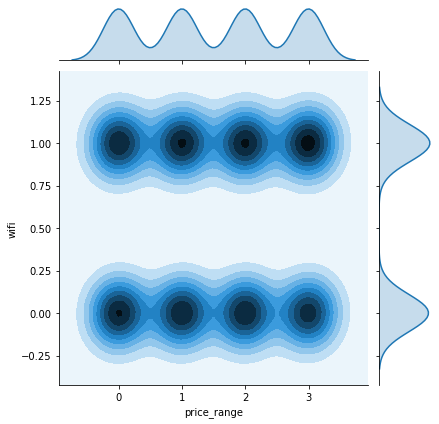

In [50]:
names = ( "battery_power", "blue", "clock_speed", "dual_sim", "fc", "four_g", "int_memory", "m_dep", "mobile_wt", "n_cores", "pc", "px_height", "px_width", "ram", "sc_h", "sc_w", "talk_time", "three_g", "touch_screen", "wifi")
for name in names:
    sns.jointplot(x="price_range", y=name, data=dataset, kind="kde")

## Вычленяем X и Y

In [58]:
x=dataset.drop('price_range',axis=1)
y=dataset['price_range']

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

## Обучаем по линейной регрессии

In [64]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [65]:
lm.fit(x_train,y_train)
lm.score(x_test,y_test)

0.9132801488185277